In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [2]:
df_1 = pd.read_csv('data/info_1.csv', index_col=0)
train_df = pd.read_csv('data/train_1.csv', header=None)
test_df = pd.read_csv('data/train_1.csv', header=None)

X_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]

X_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]

In [3]:
perceptron = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (100,),activation = 'logistic',solver = 'sgd').fit(X_train, y_train)
y_pred = perceptron.predict(X_test)

/Users/rickytechnip/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [4]:
out_pred = np.c_[np.arange(1,len(y_pred) + 1), y_pred]

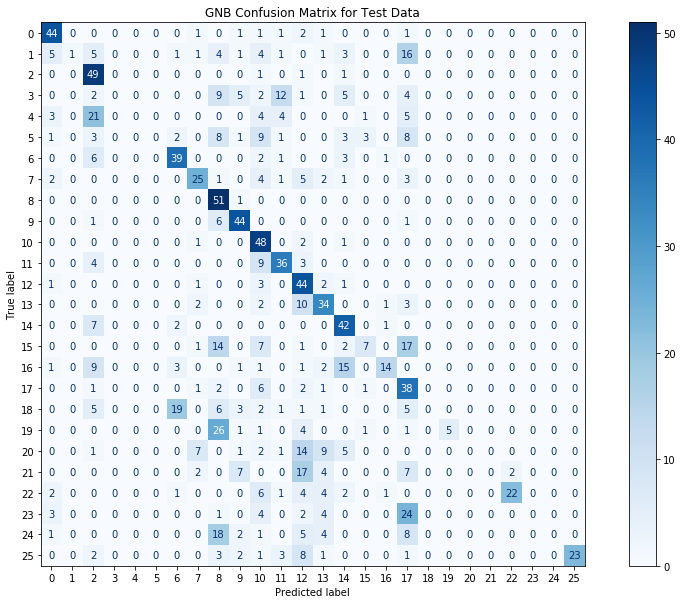

In [5]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

# show confusion matrix plot
fig, ax = plt.subplots(figsize=(16,10))
plot_confusion_matrix(perceptron, X_test, y_test, cmap='Blues', ax=ax)
ax.set_title('GNB Confusion Matrix for Test Data')
plt.show()

In [6]:
df_1['precision'] = sklearn.metrics.precision_score(y_test, y_pred, average=None, zero_division=0)
df_1['recall'] = sklearn.metrics.recall_score(y_test, y_pred, average=None)
df_1['f1'] = sklearn.metrics.f1_score(y_test, y_pred, average=None)

df_1

,symbol,precision,recall,f1
index,,,,
0,A,0.698413,0.846154,0.765217
1,B,1.000000,0.023256,0.045455
2,C,0.422414,0.942308,0.583333
3,D,0.000000,0.000000,0.000000
4,E,0.000000,0.000000,0.000000
5,F,0.000000,0.000000,0.000000
6,G,0.582090,0.750000,0.655462
7,H,0.595238,0.568182,0.581395
8,I,0.342282,0.980769,0.507463


In [7]:
scores = [
    sklearn.metrics.accuracy_score(y_test, y_pred),
    sklearn.metrics.f1_score(y_test, y_pred, average='macro'),
    sklearn.metrics.f1_score(y_test, y_pred, average='weighted')
]
model_desc = pd.DataFrame(scores, index=['accuracy', 'macro-average', 'weighted-average'], columns=['DS_1'])
model_desc

,DS_1
accuracy,0.472849
macro-average,0.358823
weighted-average,0.386700


In [8]:
%timeit df_1['new_col'] = range(1, len(df_1) + 1)
%timeit df_1['new_col'] = np.arange(1, df_1.shape[0] + 1)

50.5 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
48.7 µs ± 3.21 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
